In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어 느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨온도(input data=독립변수)를 받아서 화씨온도(target data=종속변수)를 출력
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32
# 공식 (0°C × 9/5) + 32 = 32°F

In [3]:
input_c = int(input('섭씨 온도는?'))
print('화씨온도는', celsius_to_fahrenheit(input_c))

섭씨 온도는?1
화씨온도는 33.8


# 2. 딥러닝/머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습시키기(훈련, 검증데이터셋)
- 6. 모델 평가(시험데이터셋)
- 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)
## 2.1 노이즈가 없는 데이터 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')  ## GPU가 없어서 []
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[]

In [5]:
# 1. 데이터 확보(생성)
data_C = np.arange(100)
data_C   # input데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_fahrenheit(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 스케일 조정(컴퓨터에게 학습시키기 위해 정규화/표준화:전체의 편차를 비슷하게)  -1~1 사이가 가장 이상적
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 : ', scaled_data_C)
print('타겟변수 : ', scaled_data_F)

독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1

In [8]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential   # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,)))   # 입력(독립)변수의 shape
model.add(Dense(1))            # 타겟(종속,출력)변수의 갯수
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
#                  손실함수           옵티마이저           평가지표

In [10]:
# 학습전 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 59ms/step


array([[0.        ],
       [0.00918168]], dtype=float32)

In [11]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [12]:
# 5. 모델 학습시키기 - 셀1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)
# history    독립변수(훈련dataset),타겟변수(훈련data), 학습횟수 , 학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 0.6303 - mae: 0.7522 - 279ms/epoch - 70ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.6119 - mae: 0.7407 - 5ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.5999 - mae: 0.7330 - 4ms/epoch - 994us/step
Epoch 4/1000
4/4 - 0s - loss: 0.5889 - mae: 0.7259 - 4ms/epoch - 988us/step
Epoch 5/1000
4/4 - 0s - loss: 0.5788 - mae: 0.7194 - 5ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.5690 - mae: 0.7130 - 5ms/epoch - 1ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.5596 - mae: 0.7067 - 5ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.5513 - mae: 0.7013 - 6ms/epoch - 1ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.5427 - mae: 0.6954 - 4ms/epoch - 997us/step
Epoch 10/1000
4/4 - 0s - loss: 0.5340 - mae: 0.6895 - 5ms/epoch - 1ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.5252 - mae: 0.6835 - 4ms/epoch - 997us/step
Epoch 12/1000
4/4 - 0s - loss: 0.5172 - mae: 0.6781 - 5ms/epoch - 1ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.5088 - mae: 0.6722 - 4ms/epoch - 997us/step
Epoch 14/1000
4/4 - 0

Epoch 110/1000
4/4 - 0s - loss: 0.0325 - mae: 0.1474 - 6ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0309 - mae: 0.1438 - 4ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0293 - mae: 0.1402 - 6ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0279 - mae: 0.1372 - 4ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0267 - mae: 0.1343 - 5ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0256 - mae: 0.1316 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0243 - mae: 0.1285 - 3ms/epoch - 859us/step
Epoch 117/1000
4/4 - 0s - loss: 0.0233 - mae: 0.1259 - 4ms/epoch - 997us/step
Epoch 118/1000
4/4 - 0s - loss: 0.0221 - mae: 0.1231 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0208 - mae: 0.1201 - 4ms/epoch - 1ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0198 - mae: 0.1173 - 4ms/epoch - 995us/step
Epoch 121/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1154 - 6ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0184 - mae: 0.1135 - 4ms/epoch - 995us/step
Epoc

4/4 - 0s - loss: 0.0012 - mae: 0.0295 - 4ms/epoch - 1ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0011 - mae: 0.0286 - 7ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0010 - mae: 0.0279 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 9.9884e-04 - mae: 0.0272 - 5ms/epoch - 1ms/step
Epoch 221/1000
4/4 - 0s - loss: 9.4438e-04 - mae: 0.0265 - 5ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 8.9126e-04 - mae: 0.0257 - 4ms/epoch - 998us/step
Epoch 223/1000
4/4 - 0s - loss: 8.2671e-04 - mae: 0.0249 - 5ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 7.7935e-04 - mae: 0.0241 - 5ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 7.2148e-04 - mae: 0.0232 - 4ms/epoch - 995us/step
Epoch 226/1000
4/4 - 0s - loss: 6.8031e-04 - mae: 0.0226 - 4ms/epoch - 998us/step
Epoch 227/1000
4/4 - 0s - loss: 6.2756e-04 - mae: 0.0217 - 4ms/epoch - 997us/step
Epoch 228/1000
4/4 - 0s - loss: 5.8844e-04 - mae: 0.0209 - 4ms/epoch - 884us/step
Epoch 229/1000
4/4 - 0s - loss: 5.5827e-04 - mae: 0.0205 

Epoch 317/1000
4/4 - 0s - loss: 8.5514e-08 - mae: 2.8360e-04 - 4ms/epoch - 996us/step
Epoch 318/1000
4/4 - 0s - loss: 1.4492e-07 - mae: 3.6581e-04 - 4ms/epoch - 1ms/step
Epoch 319/1000
4/4 - 0s - loss: 1.0381e-06 - mae: 9.8681e-04 - 5ms/epoch - 1ms/step
Epoch 320/1000
4/4 - 0s - loss: 8.2319e-07 - mae: 8.6829e-04 - 6ms/epoch - 1ms/step
Epoch 321/1000
4/4 - 0s - loss: 3.0345e-08 - mae: 1.6908e-04 - 5ms/epoch - 1ms/step
Epoch 322/1000
4/4 - 0s - loss: 3.8522e-07 - mae: 5.8759e-04 - 4ms/epoch - 998us/step
Epoch 323/1000
4/4 - 0s - loss: 9.0466e-07 - mae: 9.3588e-04 - 4ms/epoch - 1ms/step
Epoch 324/1000
4/4 - 0s - loss: 3.8548e-07 - mae: 5.9903e-04 - 6ms/epoch - 2ms/step
Epoch 325/1000
4/4 - 0s - loss: 1.0600e-06 - mae: 0.0010 - 5ms/epoch - 1ms/step
Epoch 326/1000
4/4 - 0s - loss: 1.4960e-07 - mae: 3.8004e-04 - 4ms/epoch - 1ms/step
Epoch 327/1000
4/4 - 0s - loss: 5.7827e-07 - mae: 7.3560e-04 - 4ms/epoch - 997us/step
Epoch 328/1000
4/4 - 0s - loss: 8.1617e-07 - mae: 8.8410e-04 - 4ms/epoch -

4/4 - 0s - loss: 1.1289e-06 - mae: 0.0010 - 6ms/epoch - 1ms/step
Epoch 415/1000
4/4 - 0s - loss: 3.3160e-07 - mae: 5.6259e-04 - 4ms/epoch - 996us/step
Epoch 416/1000
4/4 - 0s - loss: 2.6977e-07 - mae: 5.0889e-04 - 5ms/epoch - 1ms/step
Epoch 417/1000
4/4 - 0s - loss: 1.1017e-06 - mae: 0.0010 - 4ms/epoch - 997us/step
Epoch 418/1000
4/4 - 0s - loss: 5.6136e-07 - mae: 7.2256e-04 - 6ms/epoch - 2ms/step
Epoch 419/1000
4/4 - 0s - loss: 4.8426e-07 - mae: 6.7841e-04 - 6ms/epoch - 1ms/step
Epoch 420/1000
4/4 - 0s - loss: 3.9002e-07 - mae: 6.1065e-04 - 5ms/epoch - 1ms/step
Epoch 421/1000
4/4 - 0s - loss: 5.1928e-07 - mae: 6.9594e-04 - 5ms/epoch - 1ms/step
Epoch 422/1000
4/4 - 0s - loss: 6.9886e-07 - mae: 8.1880e-04 - 4ms/epoch - 997us/step
Epoch 423/1000
4/4 - 0s - loss: 8.9693e-07 - mae: 9.1179e-04 - 4ms/epoch - 1ms/step
Epoch 424/1000
4/4 - 0s - loss: 3.7796e-07 - mae: 5.9489e-04 - 4ms/epoch - 1ms/step
Epoch 425/1000
4/4 - 0s - loss: 3.1830e-07 - mae: 5.5126e-04 - 6ms/epoch - 2ms/step
Epoch 426

Epoch 512/1000
4/4 - 0s - loss: 7.2654e-07 - mae: 8.1496e-04 - 4ms/epoch - 998us/step
Epoch 513/1000
4/4 - 0s - loss: 1.6050e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch 514/1000
4/4 - 0s - loss: 6.3615e-09 - mae: 7.6676e-05 - 5ms/epoch - 1ms/step
Epoch 515/1000
4/4 - 0s - loss: 4.8455e-10 - mae: 2.0348e-05 - 4ms/epoch - 1ms/step
Epoch 516/1000
4/4 - 0s - loss: 8.1266e-09 - mae: 7.8370e-05 - 5ms/epoch - 1ms/step
Epoch 517/1000
4/4 - 0s - loss: 1.0856e-06 - mae: 9.1707e-04 - 4ms/epoch - 995us/step
Epoch 518/1000
4/4 - 0s - loss: 6.0733e-07 - mae: 7.6300e-04 - 4ms/epoch - 997us/step
Epoch 519/1000
4/4 - 0s - loss: 7.6876e-07 - mae: 8.4519e-04 - 6ms/epoch - 1ms/step
Epoch 520/1000
4/4 - 0s - loss: 6.6893e-07 - mae: 7.8870e-04 - 4ms/epoch - 997us/step
Epoch 521/1000
4/4 - 0s - loss: 1.0996e-07 - mae: 3.2349e-04 - 4ms/epoch - 995us/step
Epoch 522/1000
4/4 - 0s - loss: 5.5659e-07 - mae: 7.1528e-04 - 5ms/epoch - 1ms/step
Epoch 523/1000
4/4 - 0s - loss: 1.0789e-06 - mae: 0.0010 - 4ms/epoch -

Epoch 610/1000
4/4 - 0s - loss: 1.3128e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch 611/1000
4/4 - 0s - loss: 3.9230e-07 - mae: 6.0439e-04 - 4ms/epoch - 998us/step
Epoch 612/1000
4/4 - 0s - loss: 3.4219e-07 - mae: 5.6909e-04 - 5ms/epoch - 1ms/step
Epoch 613/1000
4/4 - 0s - loss: 4.3186e-07 - mae: 6.2984e-04 - 4ms/epoch - 1ms/step
Epoch 614/1000
4/4 - 0s - loss: 1.0495e-06 - mae: 0.0010 - 4ms/epoch - 998us/step
Epoch 615/1000
4/4 - 0s - loss: 2.7569e-07 - mae: 5.1201e-04 - 4ms/epoch - 995us/step
Epoch 616/1000
4/4 - 0s - loss: 6.5584e-07 - mae: 7.9437e-04 - 4ms/epoch - 996us/step
Epoch 617/1000
4/4 - 0s - loss: 9.5011e-07 - mae: 9.4045e-04 - 4ms/epoch - 997us/step
Epoch 618/1000
4/4 - 0s - loss: 2.0745e-07 - mae: 4.4590e-04 - 4ms/epoch - 1ms/step
Epoch 619/1000
4/4 - 0s - loss: 2.0923e-07 - mae: 4.3922e-04 - 5ms/epoch - 1ms/step
Epoch 620/1000
4/4 - 0s - loss: 1.2607e-06 - mae: 0.0011 - 4ms/epoch - 998us/step
Epoch 621/1000
4/4 - 0s - loss: 3.3697e-07 - mae: 5.6733e-04 - 5ms/epoch - 1

Epoch 708/1000
4/4 - 0s - loss: 4.1052e-07 - mae: 6.0672e-04 - 5ms/epoch - 1ms/step
Epoch 709/1000
4/4 - 0s - loss: 2.5937e-07 - mae: 4.9618e-04 - 5ms/epoch - 1ms/step
Epoch 710/1000
4/4 - 0s - loss: 8.7614e-07 - mae: 9.1345e-04 - 5ms/epoch - 1ms/step
Epoch 711/1000
4/4 - 0s - loss: 6.2337e-07 - mae: 7.7150e-04 - 4ms/epoch - 995us/step
Epoch 712/1000
4/4 - 0s - loss: 1.7589e-07 - mae: 4.0974e-04 - 4ms/epoch - 998us/step
Epoch 713/1000
4/4 - 0s - loss: 1.0295e-06 - mae: 9.8766e-04 - 4ms/epoch - 995us/step
Epoch 714/1000
4/4 - 0s - loss: 4.3924e-07 - mae: 6.4832e-04 - 5ms/epoch - 1ms/step
Epoch 715/1000
4/4 - 0s - loss: 3.7599e-07 - mae: 5.9872e-04 - 5ms/epoch - 1ms/step
Epoch 716/1000
4/4 - 0s - loss: 1.2143e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch 717/1000
4/4 - 0s - loss: 1.5534e-07 - mae: 3.6572e-04 - 4ms/epoch - 1ms/step
Epoch 718/1000
4/4 - 0s - loss: 4.7343e-07 - mae: 6.5977e-04 - 5ms/epoch - 1ms/step
Epoch 719/1000
4/4 - 0s - loss: 1.3285e-06 - mae: 0.0011 - 4ms/epoch - 998

4/4 - 0s - loss: 1.2489e-07 - mae: 3.4260e-04 - 6ms/epoch - 1ms/step
Epoch 806/1000
4/4 - 0s - loss: 7.5168e-07 - mae: 8.5218e-04 - 4ms/epoch - 995us/step
Epoch 807/1000
4/4 - 0s - loss: 8.4008e-07 - mae: 8.9520e-04 - 4ms/epoch - 1ms/step
Epoch 808/1000
4/4 - 0s - loss: 5.7889e-07 - mae: 7.3860e-04 - 5ms/epoch - 1ms/step
Epoch 809/1000
4/4 - 0s - loss: 2.5729e-07 - mae: 4.9841e-04 - 5ms/epoch - 1ms/step
Epoch 810/1000
4/4 - 0s - loss: 4.1895e-07 - mae: 6.2480e-04 - 7ms/epoch - 2ms/step
Epoch 811/1000
4/4 - 0s - loss: 1.1605e-06 - mae: 0.0011 - 4ms/epoch - 986us/step
Epoch 812/1000
4/4 - 0s - loss: 2.6759e-07 - mae: 5.0088e-04 - 4ms/epoch - 996us/step
Epoch 813/1000
4/4 - 0s - loss: 6.4495e-08 - mae: 2.3491e-04 - 5ms/epoch - 1ms/step
Epoch 814/1000
4/4 - 0s - loss: 5.6570e-07 - mae: 7.0207e-04 - 4ms/epoch - 997us/step
Epoch 815/1000
4/4 - 0s - loss: 1.1325e-06 - mae: 0.0010 - 9ms/epoch - 2ms/step
Epoch 816/1000
4/4 - 0s - loss: 7.2271e-07 - mae: 7.9593e-04 - 4ms/epoch - 1ms/step
Epoch 8

Epoch 903/1000
4/4 - 0s - loss: 4.3821e-07 - mae: 6.1337e-04 - 4ms/epoch - 995us/step
Epoch 904/1000
4/4 - 0s - loss: 2.0575e-07 - mae: 4.4174e-04 - 4ms/epoch - 1ms/step
Epoch 905/1000
4/4 - 0s - loss: 3.6198e-07 - mae: 5.7598e-04 - 5ms/epoch - 1ms/step
Epoch 906/1000
4/4 - 0s - loss: 1.1332e-06 - mae: 0.0010 - 4ms/epoch - 1ms/step
Epoch 907/1000
4/4 - 0s - loss: 1.7503e-07 - mae: 4.0896e-04 - 5ms/epoch - 1ms/step
Epoch 908/1000
4/4 - 0s - loss: 1.7167e-07 - mae: 3.9235e-04 - 6ms/epoch - 1ms/step
Epoch 909/1000
4/4 - 0s - loss: 1.6345e-06 - mae: 0.0012 - 4ms/epoch - 1ms/step
Epoch 910/1000
4/4 - 0s - loss: 9.6703e-08 - mae: 3.0244e-04 - 4ms/epoch - 979us/step
Epoch 911/1000
4/4 - 0s - loss: 3.0205e-07 - mae: 5.3591e-04 - 4ms/epoch - 1ms/step
Epoch 912/1000
4/4 - 0s - loss: 7.3513e-07 - mae: 8.3381e-04 - 8ms/epoch - 2ms/step
Epoch 913/1000
4/4 - 0s - loss: 1.0325e-06 - mae: 9.2601e-04 - 4ms/epoch - 995us/step
Epoch 914/1000
4/4 - 0s - loss: 2.6017e-07 - mae: 4.9349e-04 - 5ms/epoch - 1ms

In [13]:
# 6. 모델 과정 시각화 
hist.history.keys()

dict_keys(['loss', 'mae'])

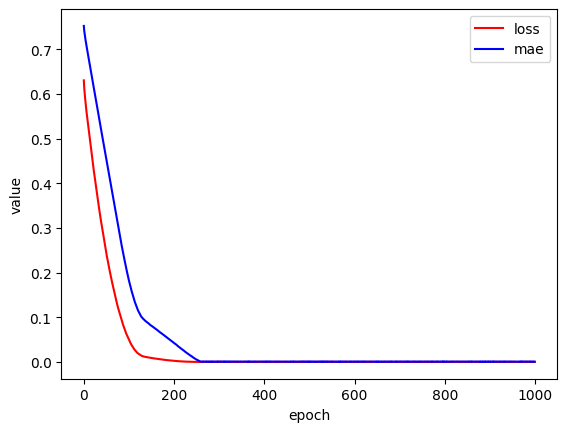

In [14]:
plt.plot(hist.history['loss'],'r', label='loss')
plt.plot(hist.history['mae'],'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [15]:
# 7. 모델 사용/저장
model.predict(np.array([[0],
                        [0.01],
                        [0.02]]))

1/1 [==============================] - 0s 16ms/step


array([[0.31963372],
       [0.33763197],
       [0.35563025]], dtype=float32)

In [16]:
model.save('model/after_learning.h5')  #tensorflow 2.10

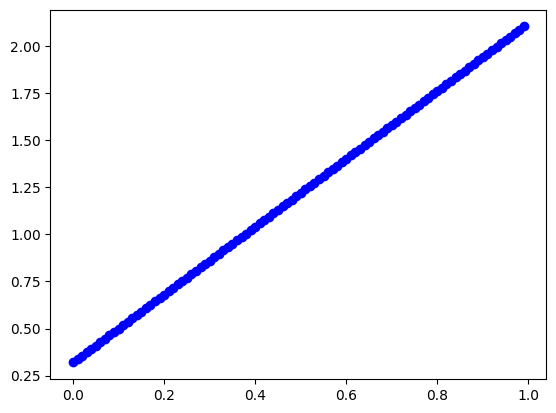

In [17]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')

In [18]:
# 예측값 ^y  실제값 scaled_data_F
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat[::20], scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 1ms/step
[0.31963372] 0.32
[0.6795989] 0.68
[1.0395641] 1.04
[1.3995292] 1.4
[1.7594944] 1.76


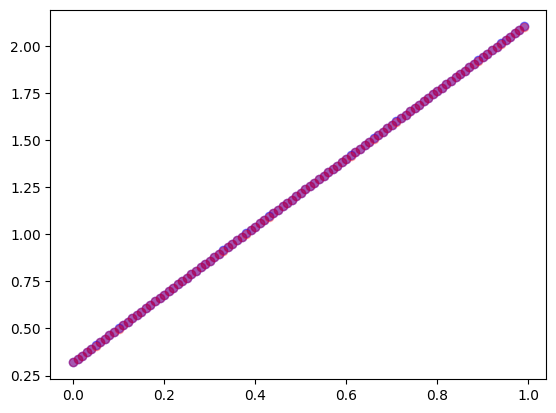

In [19]:
plt.scatter(x=scaled_data_C, y=scaled_data_F,c='b',alpha=0.5)
plt.scatter(x=scaled_data_C, y=y_hat,c='r',alpha=0.3)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [20]:
scaled_data_C   # 독립변수

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [21]:
scaled_data_F

array([0.32 , 0.338, 0.356, 0.374, 0.392, 0.41 , 0.428, 0.446, 0.464,
       0.482, 0.5  , 0.518, 0.536, 0.554, 0.572, 0.59 , 0.608, 0.626,
       0.644, 0.662, 0.68 , 0.698, 0.716, 0.734, 0.752, 0.77 , 0.788,
       0.806, 0.824, 0.842, 0.86 , 0.878, 0.896, 0.914, 0.932, 0.95 ,
       0.968, 0.986, 1.004, 1.022, 1.04 , 1.058, 1.076, 1.094, 1.112,
       1.13 , 1.148, 1.166, 1.184, 1.202, 1.22 , 1.238, 1.256, 1.274,
       1.292, 1.31 , 1.328, 1.346, 1.364, 1.382, 1.4  , 1.418, 1.436,
       1.454, 1.472, 1.49 , 1.508, 1.526, 1.544, 1.562, 1.58 , 1.598,
       1.616, 1.634, 1.652, 1.67 , 1.688, 1.706, 1.724, 1.742, 1.76 ,
       1.778, 1.796, 1.814, 1.832, 1.85 , 1.868, 1.886, 1.904, 1.922,
       1.94 , 1.958, 1.976, 1.994, 2.012, 2.03 , 2.048, 2.066, 2.084,
       2.102])

In [22]:
# 평균 0, 표준편차 0.1인 데이터 100개인 배열
np.random.seed(707) # 사용자들의 노이즈 일치시키기
noise = np.random.normal(0, scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
print('독립변수 :', scaled_data_C[:10])
print('타겟변수 :', noised_scaled_data_F[:10])

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
타겟변수 : [0.27500034 0.20410134 0.39498826 0.27117424 0.26897164 0.35314388
 0.4496784  0.42612159 0.49409646 0.45740286]


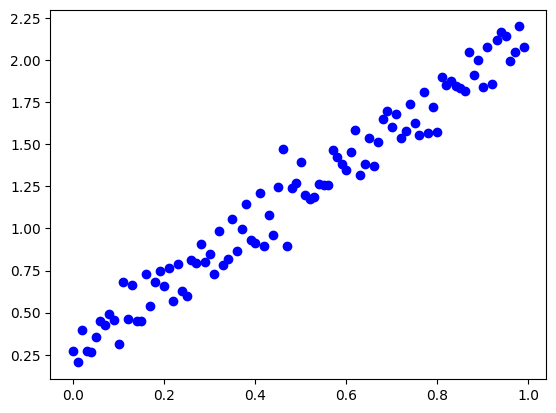

In [23]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F,c='b')

In [37]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# model.add(Input(shape=(1,)))   # 입력(독립)변수의 shape
# model.add(Dense(1))            # 타겟(종속,출력)변수의 갯수
print(model2.summary())
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# 5. 학습시키기
his = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000,verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 - 0s - loss: 0.2956 - mae: 0.5151 - 220ms/epoch - 55ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.2831 - mae: 0.5036 - 4ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.2751 - mae: 0.4959 - 6ms/epoch - 1ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.2678 - mae: 0.4888 - 5ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.2611 - mae: 0.4823 - 6ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.2554 - mae: 0.4766 - 6ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.2496 - mae: 0.4708 - 6ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.2441 - mae: 0.4652 - 5ms/epoch

Epoch 103/1000
4/4 - 0s - loss: 0.0122 - mae: 0.0921 - 5ms/epoch - 1ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.0122 - mae: 0.0920 - 3ms/epoch - 761us/step
Epoch 105/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0918 - 6ms/epoch - 1ms/step
Epoch 106/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0918 - 6ms/epoch - 2ms/step
Epoch 107/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0916 - 6ms/epoch - 1ms/step
Epoch 108/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0915 - 6ms/epoch - 1ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0913 - 8ms/epoch - 2ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0913 - 4ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0912 - 6ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0911 - 5ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0910 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0909 - 6ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0908 - 5ms/epoch - 1ms/step
Epoch 116/

Epoch 210/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 3ms/epoch - 747us/step
Epoch 211/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1ms/step
Epoch 212/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 5ms/epoch - 1ms/step
Epoch 213/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 214/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 2ms/step
Epoch 215/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 842us/step
Epoch 216/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 3ms/epoch - 760us/step
Epoch 217/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 219/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 998us/step
Epoch 221/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step


Epoch 317/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 747us/step
Epoch 318/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 319/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 320/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 321/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 997us/step
Epoch 322/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 746us/step
Epoch 323/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 6ms/epoch - 2ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 326/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 4ms/epoch - 962us/step
Epoch 327/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 328/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/s

Epoch 424/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 425/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 426/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 4ms/epoch - 1ms/step
Epoch 427/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 428/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 429/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 2ms/step
Epoch 430/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 986us/step
Epoch 433/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 995us/step
Epoch 434/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 6ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step


Epoch 531/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 532/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 534/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 997us/step
Epoch 535/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 5ms/epoch - 1ms/step
Epoch 536/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 4ms/epoch - 996us/step
Epoch 537/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 6ms/epoch - 2ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 3ms/epoch - 834us/step
Epoch 539/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 1ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 542/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 808us/step


Epoch 638/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 5ms/epoch - 1ms/step
Epoch 639/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 640/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 641/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 5ms/epoch - 1ms/step
Epoch 642/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 643/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 644/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 847us/step
Epoch 646/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 746us/step
Epoch 647/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 747us/step
Epoch 650/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 

Epoch 745/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 746/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 1ms/step
Epoch 747/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 996us/step
Epoch 748/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 989us/step
Epoch 749/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 995us/step
Epoch 750/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 751/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 2ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 753/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 862us/step
Epoch 756/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 905us/step
Epoch 757/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/ste

4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 852/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 853/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 854/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 995us/step
Epoch 855/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 856/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 857/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 858/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 3ms/epoch - 747us/step
Epoch 859/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 996us/step
Epoch 860/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 5ms/epoch - 1ms/step
Epoch 861/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 770us/step
Epoch 862/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 747us/step
Epoch 863/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 864/1

Epoch 958/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 959/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 996us/step
Epoch 960/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 997us/step
Epoch 961/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 998us/step
Epoch 962/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 5ms/epoch - 1ms/step
Epoch 963/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 5ms/epoch - 1ms/step
Epoch 964/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 1ms/step
Epoch 965/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 995us/step
Epoch 966/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 6ms/epoch - 1ms/step
Epoch 967/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 7ms/epoch - 2ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 997us/step
Epoch 970/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Ep

In [38]:
# 6. 학습과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'mae'])

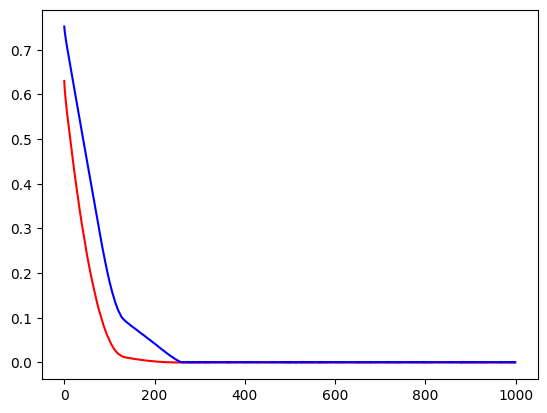

In [39]:
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['mae'],'b')

In [40]:
# 7. 모델 사용
model2.predict(np.array([[-0.01],
                         [0],
                         [0.01],
                         [0.02]]))

1/1 [==============================] - 0s 30ms/step


array([[0.26493227],
       [0.28355992],
       [0.30218756],
       [0.3208152 ]], dtype=float32)

In [41]:
y_hat = model2.predict([scaled_data_C])
for h, y in zip(y_hat[::20], noised_scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 998us/step
[0.28355992] 0.2750003435726217
[0.6561129] 0.6573517921634632
[1.0286659] 0.9109195630083544
[1.4012189] 1.3455450551349164
[1.7737719] 1.5738145874658984


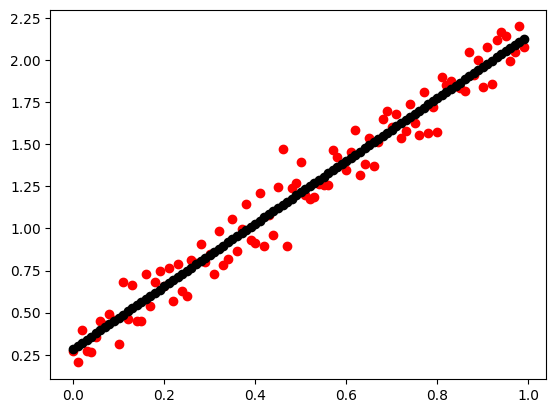

In [42]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='r')
plt.scatter(x=scaled_data_C, y=y_hat, c='k')

In [44]:
# 모델 저장
model2.save('model/noised_after_learning.h5')
# from tensorflow.keras.models import save_model
# save_model(model2, 'model/noised_after_learning1.h5')
# save_model(model2, 'model/noised_after_learning1.keras')   # tensorflow2.16이상에서... 

In [45]:
# 저장된 모델 사용하기
from tensorflow.keras.models import load_model
model3 = load_model('model/noised_after_learning.h5')

In [46]:
model3.predict(np.array([[-0.01],
                         [0],
                         [0.01]]))

1/1 [==============================] - 0s 29ms/step


array([[0.26493227],
       [0.28355992],
       [0.30218756]], dtype=float32)